<a href="https://colab.research.google.com/github/Priyanka-Police-Reddy-Gari/SpamDetection/blob/main/Priyanka_file2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    import sys

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !python -m spacy download en_core_web_sm -qq

    base_path = '/content/drive/MyDrive'
    sys.path.append('/content/drive/MyDrive/NLP')
else:
    pass

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
sys.path.append('/content/drive/MyDrive/NLP/data/custom-functions')

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP',
 '/content/drive/MyDrive/NLP/data/custom-fuctions',
 '/content/drive/MyDrive/NLP/data/custom-functions']

In [ ]:
from pathlib import Path
import joblib
import pandas as pd, os, numpy as np, spacy, nltk

nltk.download('stopwords')
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nlp = spacy.load('en_core_web_sm')  # loading spacy model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [ ]:
from collections import Counter
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
base_path = Path(base_path)
print(base_path)


/content/drive/MyDrive


In [ ]:
spam_data = pd.read_csv('/content/drive/MyDrive/NLP/Assignment_2/spam.csv',encoding='latin1')
print(spam_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
columns_to_delete = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ]
spam_df = spam_data.drop(columns=columns_to_delete)
print(spam_df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
spam_df = spam_df.rename(columns={'v1':'label','v2':'message'})
print(spam_df.columns)
print(spam_df.head())

Index(['label', 'message'], dtype='object')
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(spam_df, test_size=0.2)

In [ ]:
train_sub = train.sample(frac=0.4, replace=True, random_state=1)
test_sub = test.sample(frac=0.4, replace=True, random_state=1)

In [ ]:
print(train_sub.shape)
print(test_sub.shape)

(1783, 2)
(446, 2)


In [ ]:
X_train = train_sub['message'].values
X_test = test_sub['message'].values
y_train = train_sub['label'].values
y_test = test_sub['label'].values

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1783,), (1783,), (446,), (446,))

In [ ]:
X_train_sub_cleaned = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_train)
X_test_sub_cleaned = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_test)

/content/drive/MyDrive/NLP/data/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
joblib.dump(X_train_sub_cleaned, base_path/"X_train_sample_cleaned.pkl")
joblib.dump(X_test_sub_cleaned, base_path/"X_test_sample_cleaned.pkl")

['/content/drive/MyDrive/X_test_sample_cleaned.pkl']

In [ ]:
y_train = pd.Series(np.where(y_train == 'spam', 1, 0))  # 1 - spam and 0 - ham
y_test = pd.Series(np.where(y_test == 'spam', 1, 0))

In [ ]:
X_train_sub_cleaned, y_train = shuffle(X_train_sub_cleaned, y_train, random_state=42)

In [ ]:
y_train.value_counts()  # imbalanced dataset

0    1558
1     225
dtype: int64

In [ ]:
X_train_cleaned_FE = cp.SpacyPreprocessor(model='en_core_web_sm',
                                       lemmatize=True,
                                       lower=False,
                                       remove_stop=False,
                                       remove_punct=False,
                                       remove_email=False,
                                       remove_url=False,
                                       add_user_mention_prefix=True,
                                       basic_clean_only=False).transform(X_train)
X_train_cleaned_FE = pd.Series(X_train_cleaned_FE)
joblib.dump(X_train_cleaned_FE, base_path / 'x_train_cleaned_basic_small_feature_engineering.pkl')

/content/drive/MyDrive/NLP/data/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


['/content/drive/MyDrive/x_train_cleaned_basic_small_feature_engineering.pkl']

In [ ]:
X_test_cleaned_FE = cp.SpacyPreprocessor(model='en_core_web_sm',
                                       lemmatize=True,
                                       lower=False,
                                       remove_stop=False,
                                       remove_punct=False,
                                       remove_email=False,
                                       remove_url=False,
                                       add_user_mention_prefix=True,
                                       basic_clean_only=False).transform(X_test)
X_test_cleaned_FE = pd.Series(X_test_cleaned_FE)
joblib.dump(X_test_cleaned_FE, base_path / 'x_test_cleaned_basic_small_feature_engineering.pkl')

/content/drive/MyDrive/NLP/data/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


['/content/drive/MyDrive/x_test_cleaned_basic_small_feature_engineering.pkl']

In [ ]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 1000)
X_train_cleaned_fe, feature_names_train = featurizer.fit_transform(X_train_cleaned_FE.values)
X_test_features_fe, feature_names_test = featurizer.fit_transform(X_test_cleaned_FE.values)

In [ ]:
X_train_final = pd.concat([pd.DataFrame(X_train_sub_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_train_cleaned_fe, columns=feature_names_train)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_sub_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_test_features_fe, columns=feature_names_test)], axis=1)

In [ ]:
from scipy.sparse import csr_matrix
class SparseTransformer(TransformerMixin, BaseEstimator):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

sparse_features = Pipeline([('sparse', SparseTransformer()),])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)),])

combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)

In [ ]:
pipeline_final = Pipeline([('combined_features',  combined_features),
                           ('classifier', LogisticRegression(max_iter=10000)),

                         ])
# pipeline_final.get_params().keys()

In [ ]:
grid_pipeline_final = {
    'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000],
    'classifier__C': [0.1, 1, 10],
    'classifier__class_weight':["balanced"]
}

grid_classifier_final = RandomizedSearchCV(estimator=pipeline_final,
                                     param_distributions=grid_pipeline_final,
                                     cv=3, scoring = 'f1_macro')
grid_classifier_final.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('combined_features',
                                              ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                           SparseTransformer())]),
                                                                transformers=[('tfidf',
                                                                               Pipeline(steps=[('tfidf',
                                                                                                TfidfVectorizer(max_features=5))]),
                                                                               'cleaned_text')])),
                                             ('classifier',
                                              LogisticRegression(max_iter=10000))]),
                   param_distributions={'classifier__C': [0.1, 1, 10],
                                        'classifier__class_weight': ['balanced'],
                                        'combined_features__tfidf__tfidf__max_features': [500,
                                                                                          1000,
                                                                                          2000]},
                   scoring='f1_macro')

In [ ]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_final.best_score_))
print("\nBest parameters: ", grid_classifier_final.best_params_)
print("\nBest estimator: ", grid_classifier_final.best_estimator_)

Best cross-validation score: 0.95

Best parameters:  {'combined_features__tfidf__tfidf__max_features': 2000, 'classifier__class_weight': 'balanced', 'classifier__C': 10}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=2000))]),
                                                  'cleaned_text')])),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=10000))])


In [ ]:
joblib.dump(grid_classifier_final.best_estimator_, base_path/"final_logit_best_estimator.pkl")
joblib.dump(grid_classifier_final, base_path/"final_logit_complete_grid.pkl")

['/content/drive/MyDrive/final_logit_complete_grid.pkl']

In [ ]:
best_estimator_pipeline3_round1 = joblib.load(base_path/"final_logit_best_estimator.pkl")
complete_grid_pipeline3_round1 = joblib.load(base_path/"final_logit_complete_grid.pkl")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

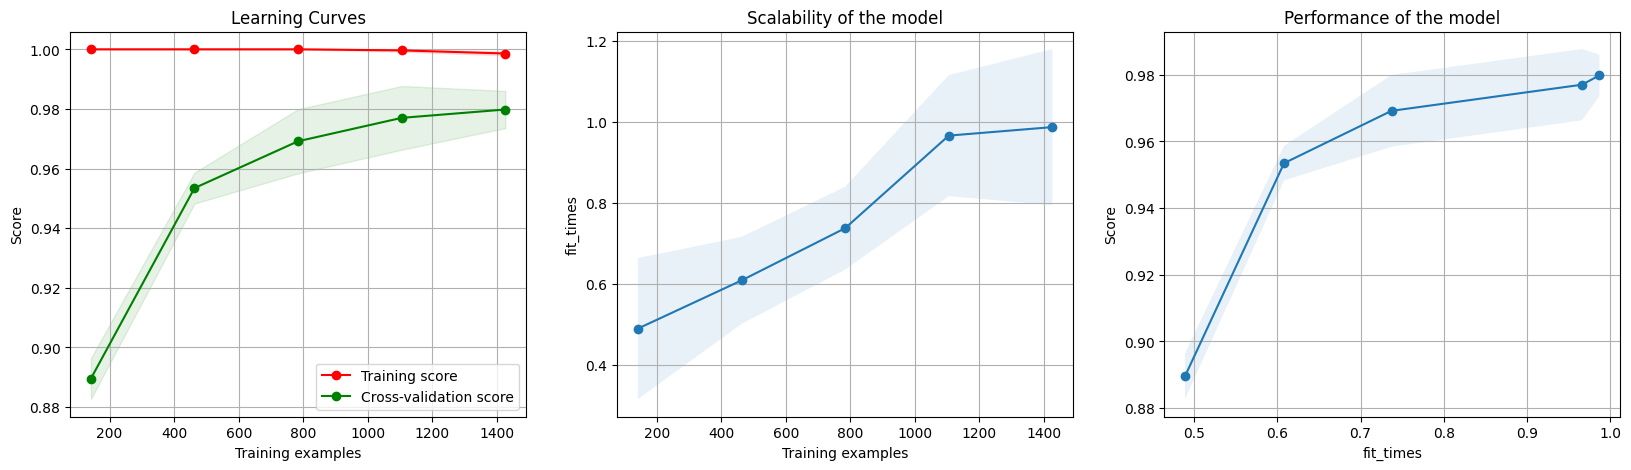

In [ ]:
# plot learning curves
plot_learning_curve(best_estimator_pipeline3_round1, 'Learning Curves',
                    X_train_final, y_train, n_jobs=-1)

In [ ]:
# let's check the train scores
print(best_estimator_pipeline3_round1.score(X_train_final, y_train))

0.9983174425126192


In [ ]:
# let's check the cross validation score
print(complete_grid_pipeline3_round1.best_score_)

0.9477299824788306


In [ ]:
X_test_cleaned_sparse = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 200,lemmatize=True).transform(X_test)
file_X_test_cleaned_sparse = base_path / 'x_test_cleaned_sparse_embedded_40.pkl'
joblib.dump(X_test_cleaned_sparse, file_X_test_cleaned_sparse)

/content/drive/MyDrive/NLP/data/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


['/content/drive/MyDrive/x_test_cleaned_sparse_embedded_40.pkl']

In [ ]:
X_test.shape

(446,)

In [ ]:
file_best_estimator_pipeline3_round1 = base_path/"final_logit_best_estimator.pkl"

In [ ]:
# Final Pipeline
def final_pipeline(text):
    cleaned_text = joblib.load(file_X_test_cleaned_sparse)
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(cleaned_text, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    best_estimator_pipeline3_round1 = joblib.load(file_best_estimator_pipeline3_round1)
    predictions = best_estimator_pipeline3_round1.predict(X_final)
    return predictions


y_test_pred = final_pipeline(X_test)

In [ ]:
print('\nTest set classification report:\n\n', classification_report(y_test, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97       373
           1       0.84      0.81      0.83        73

    accuracy                           0.94       446
   macro avg       0.90      0.89      0.90       446
weighted avg       0.94      0.94      0.94       446

